In [4]:
from EvenTem import Roi, vSTEM
import matplotlib.pyplot as plt
import numpy as np

In [5]:
filename = r"d:\DATA-local\zif8_210325\zif8\2025-03-21_11-29-12\raw000000.tpx3"
DetectorSize = 512
repetitions = 1
N = 2048
DwellTime = 5000

## First, use vSTEM to make a complete navigation image

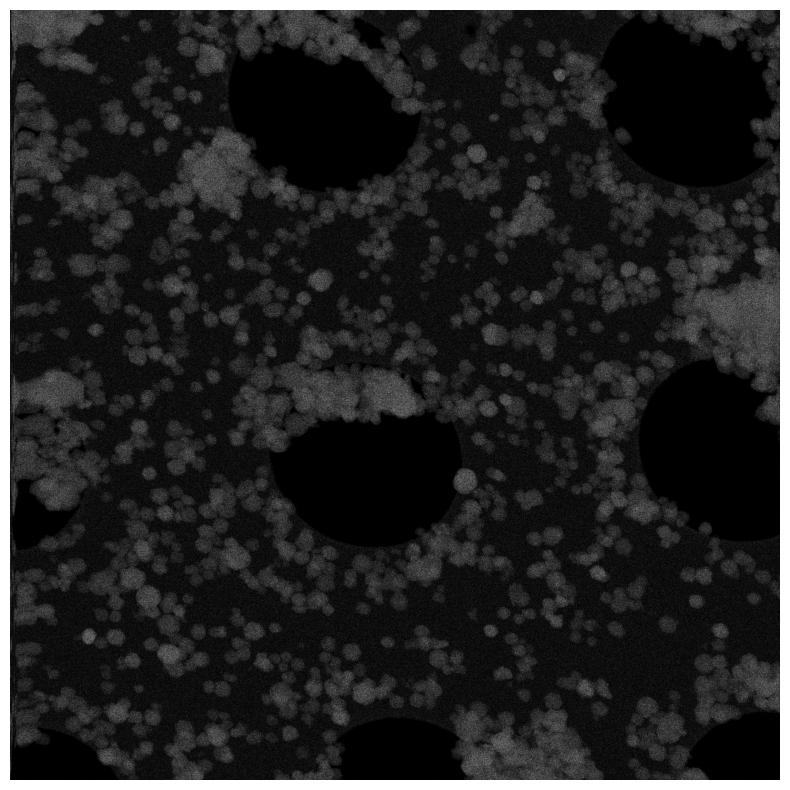

In [6]:
vs = vSTEM(nx=N,ny=N,repetitions=repetitions,filename=filename)
vs.DetectorSize = DetectorSize
vs.DwellTime = DwellTime
vs.InnerRadia = [50]
vs.OuterRadia = [vs.DetectorSize]
vs.Run()
vs.PlotImage()

## now we can select a region of interest
    remember, the axis convention is like 

    (0,0) ----------- axis 1
    |
    |
    |
    |
    |
    axis 0 

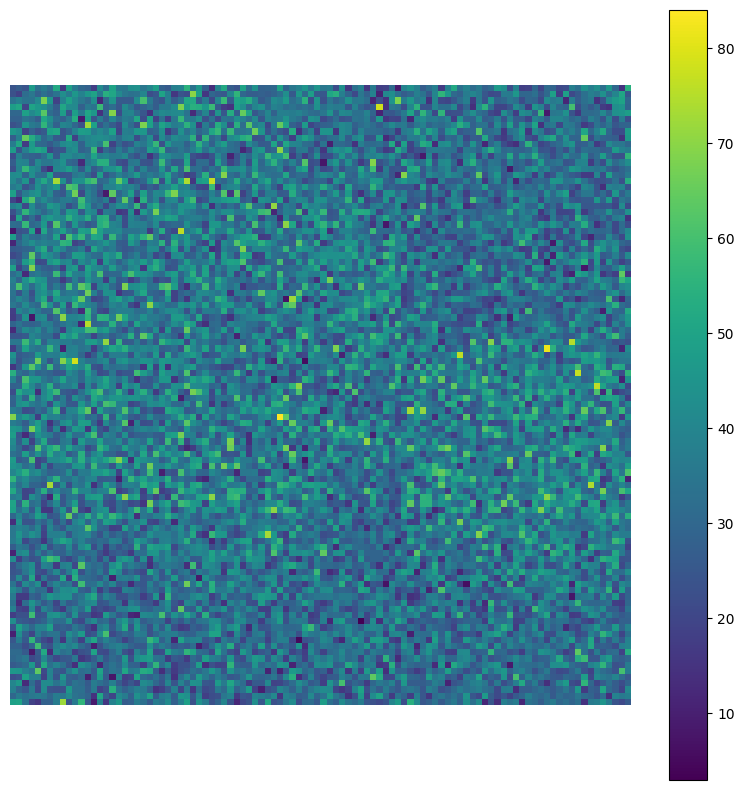

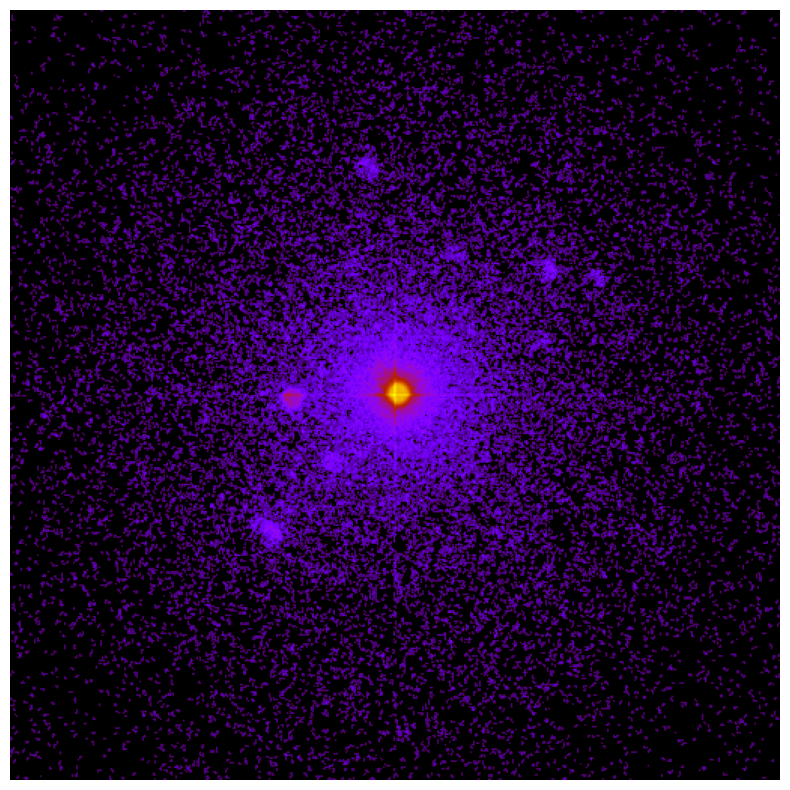

In [7]:
ROI = Roi(nx=N,ny=N,repetitions=repetitions,filename=filename,extract_4D=False)
ROI.DetectorSize = DetectorSize
ROI.DwellTime = DwellTime
ROI.SetROI(x_origin=256,y_origin=256,width=100,height=100)
ROI.Run()


scan_im = ROI.ScanImage
plt.figure(figsize=(10,10))
plt.imshow(scan_im)
plt.axis('off')
plt.colorbar()
plt.show()

det_im = ROI.DiffractionPattern
plt.figure(figsize=(10,10))
plt.imshow(np.log(det_im+1),cmap='gnuplot')
plt.axis('off')
plt.show()


In [8]:
ROI = Roi(nx=N,ny=N,repetitions=repetitions,filename=filename,extract_4D=True)
ROI.DetectorSize = DetectorSize
ROI.DwellTime = DwellTime #not relevant for simulation
ROI.ROI = (42,42,5,5) #x_origin,y_origin,width,height
ROI.DetectorBin = 2
ROI.Run()

extracting 4D sub-dataset that requires 0.00 GB of RAM


In [9]:
ROI_4D = ROI.Roi4D
print(f"ROI_4D shape: {ROI_4D.shape}")
print(f"ROI_4D dtype: {ROI_4D.dtype}")

ROI_4D shape: (5, 5, 256, 256)
ROI_4D dtype: uint8


(-0.5, 511.5, 511.5, -0.5)

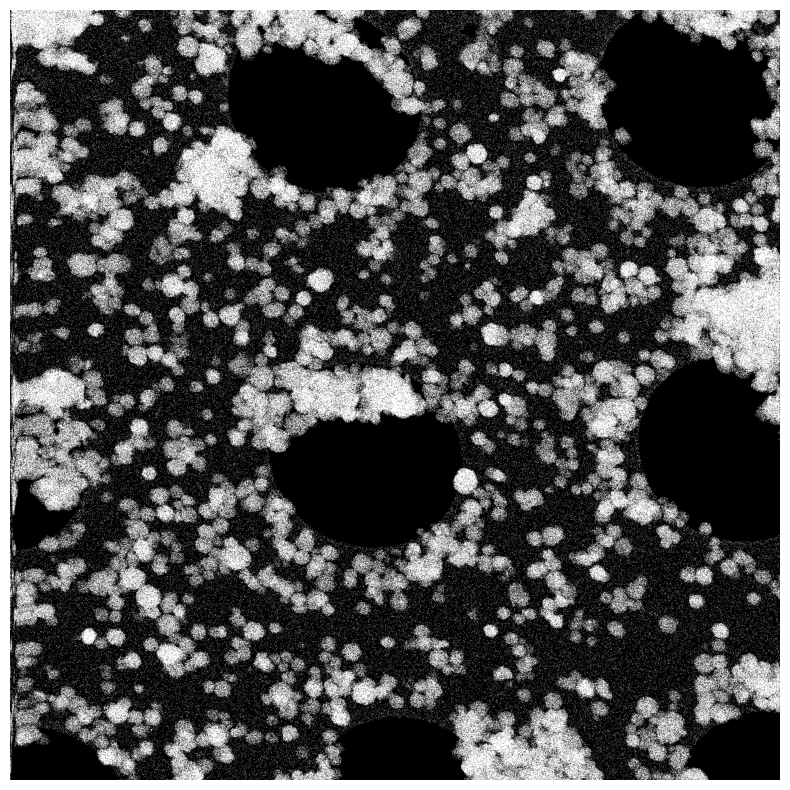

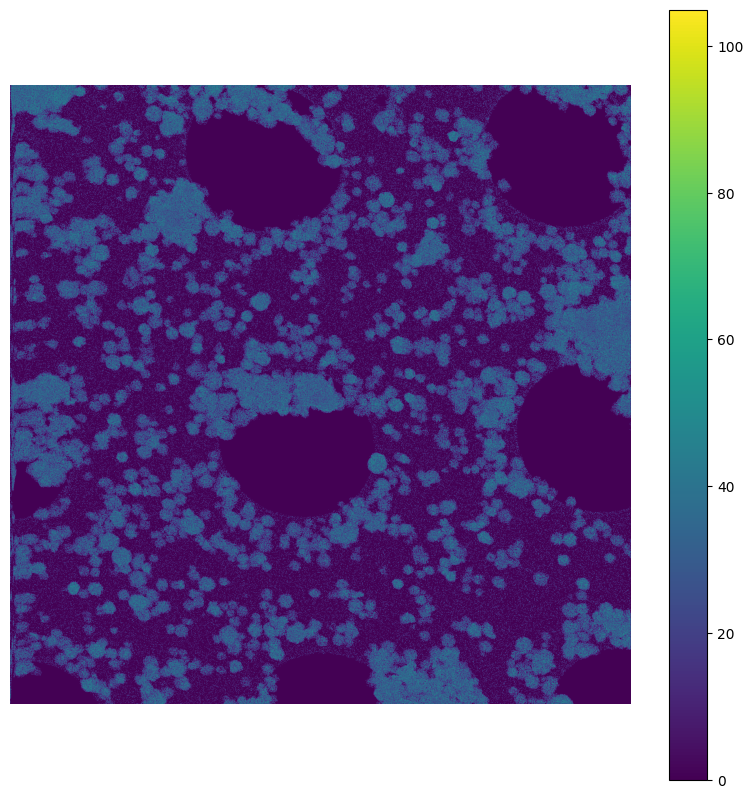

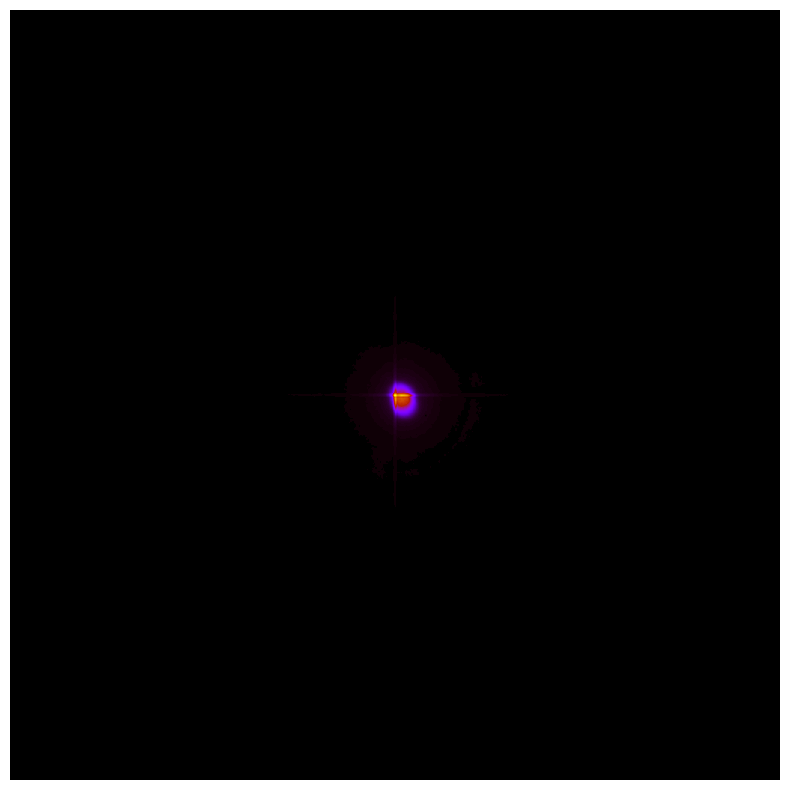

In [10]:
from skimage.filters import threshold_otsu

bin_mask = vs.image > threshold_otsu(vs.image)

plt.figure(figsize=(10,10))
plt.imshow(bin_mask, cmap='gray')
plt.axis('off')


ROI = Roi(nx=N,ny=N,repetitions=repetitions,filename=filename,extract_4D=False)
ROI.DetectorSize = DetectorSize
ROI.DwellTime = DwellTime #not relevant for simulation
ROI.SetROIMask([bin_mask])
ROI.Run()

scan_im = ROI.ScanImage
plt.figure(figsize=(10,10))
plt.imshow(scan_im)
plt.axis('off')
plt.colorbar()

det_im = ROI.DiffractionPattern
plt.figure(figsize=(10,10))
plt.imshow(det_im,cmap='gnuplot')
plt.axis('off')